<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Juan Pablo Blanco Lemus, Dafne Tamayo León

**Fecha:** 15 de marzo del 2025.

**Expediente** : 744534.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-3.git

# Tarea 4: Clase 11

## Enunciado de tarea (Transcibirlo)

### Ejercicio 1: (enunciado) Transcribirlo
> Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

> - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
> - https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Código de solución estudiante 1

In [17]:
# Código de solución estudiante 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

df = pd.read_csv('Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Ok, vemos que tenemos que tratar un poco los datos en cuestiones de categorías que se tendrán que encodear, pero en general los datos se ven bien.
Nuestra variable objetivo es `price`, las variables categóricas son `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea` y `furnishingstatus`. De estas variables, `furnishingstatus` es la que tiene más categorías, por lo que se tendrá que hacer un encodeo especial. Las otras son binarias, por lo que se les puede aplicar un `LabelEncoder`.

In [18]:
from sklearn.preprocessing import LabelEncoder

binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

le = LabelEncoder()

for var in binary_vars:
    df[var] = le.fit_transform(df[var])

print("Variables binarias encodeadas:")
df[binary_vars].head()


Variables binarias encodeadas:


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


Ahora encodeamos la variable `furnishingstatus` con un `OneHotEncoder`.

In [19]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


Bien, ya tenemos nuestros datos encodeados. Ahora vamos a dividir nuestros datos en `X` y `y`.

In [22]:
target_column = 'price'
feature_column = df.columns.drop(target_column)

In [23]:
X = df[feature_column].values
y = df[target_column].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (545, 14)
y shape: (545,)


Bien, ahora dividimos nuestro datos en conjuntos de entrenamiento y prueba. Utilizaremos un 20% de los datos para prueba.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 14)
y_train shape: (436,)
X_test shape: (109, 14)
y_test shape: (109,)


Ahora pasemos a normalizar los datos para que el modelo se entrene de forma eficiente y estable. Utilizaremos un `StandardScaler` para esto, que lo que hace es restar la media y dividir por la desviación estándar.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Primeras 5 filas de X_train escalado:")
X_trained_scaled[:5]

Primeras 5 filas de X_train escalado:


array([[ 0.38416819,  0.05527092,  1.53917323,  2.58764353,  0.40715525,
        -0.46677307, -0.74642003, -0.23052136,  1.50124327,  0.36795665,
        -0.55262032,  1.71111891, -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, -0.91249891,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136,  1.50124327,  2.70998729,
        -0.55262032, -0.58441292,  1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , -0.91249891,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136,  1.50124327,  1.53897197,
        -0.55262032,  1.71111891, -0.870669  , -0.67690027],
       [-1.15549214,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
        -0.46677307,  1.33972825, -0.23052136, -0.66611456, -0.80305867,
         1.80956067, -0.58441292, -0.870669  ,  1.47732249],
       [-0.63773026,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
        -0.46677307, -0.74642003, -0.23052136, -0.66611456, -0.80305867,
        -0.55262032, -0.58

Vamos a aplicar un Reshape a los datos para que tengan la forma que espera una CNN.
Las redes convolucionales 1D esperan que los datos de entrada tengan la forma `(n_samples, n_timesteps, n_features)`. En nuestro caso, cada muestra es un vector de características (n_features), y lo trataremos como una secuencia de n_features con 1 canal.

In [27]:
# Primero obtenemos el número de características (n_features)
n_features = X_train.shape[1]

# Ahora hacemos un reshape de los datos
X_train_cnn = X_trained_scaled.reshape(X_trained_scaled.shape[0], n_features, 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], n_features, 1)

print("Nueva forma de X_train para CNN:", X_train_cnn.shape)
print("Nueva forma de X_test para CNN:", X_test_cnn.shape)

Nueva forma de X_train para CNN: (436, 14, 1)
Nueva forma de X_test para CNN: (109, 14, 1)


Explicando un poco más, lo que hicimos fue reestructurar el array para que tenga tres dimensiones:
* __Dimensión 1__: Número de muestras.
* __Dimensión 2__: Número de características.
* __Dimensión 3__: Número de canales.

#### Arquitecura de la CNN

Vamos a construir un modelo CNN para regresión. La arquitectura que utilizaremos será la siguiente:
+ __Capa Conv1D__: Extrae características de la secuencia.
+ __Capa MaxPooling1D__: Reduce la dimensionalidad de las características.
+ __Otra capa Conv1D y Pooling__: Para capturar patrones más complejos.
+ __Capa Flatten__: Para convertir las características en un vector.
+ __Capa Dense__: Con una capa oculta intermedia y la capa de salida final para la predicción del precio.

In [28]:
model_cnn = keras.models.Sequential([
    # Primera capa convolucional: 32 filtros, kernel_size=2, función de activación ReLU
    keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_features, 1)),

    # Capa de MaxPooling para reducir la dimensionalidad
    keras.layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional: 64 filtros, kernel_size=2, función de activación ReLU
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),

    # Otra capa de MaxPooling
    keras.layers.MaxPooling1D(pool_size=2),

    # Capa Flatten para convertir las características en un vector
    keras.layers.Flatten(),

    # Capa Dense con 50 neuronas y función de activación ReLU
    keras.layers.Dense(50, activation='relu'),

    # Capa de salida con 1 neurona para regresión, sin función de activación.
    keras.layers.Dense(1)
])

model_cnn.summary()

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

Compilemos el modelo y entrenamos la CNN.

In [29]:
model_cnn.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [30]:
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=100,            # Número de épocas
                            batch_size=32,         # Tamaño del batch para cada actualización
                            validation_split=0.2,  # Reserva el 20% del entrenamiento para validación
                            verbose=1)



Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24807334739968.0000 - mae: 4685945.0000 - val_loss: 24781590102016.0000 - val_mae: 4623896.5000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25973909094400.0000 - mae: 4794838.0000 - val_loss: 24781564936192.0000 - val_mae: 4623894.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24745215000576.0000 - mae: 4661619.0000 - val_loss: 24781512507392.0000 - val_mae: 4623888.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26083372040192.0000 - mae: 4789986.5000 - val_loss: 24781405552640.0000 - val_mae: 4623877.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25267500220416.0000 - mae: 4731480.5000 - val_loss: 24781204226048.0000 - val_mae: 4623856.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25389470580736.0000 - mae: 4705197.5000 - val_loss: 24780847710208.0000 - val_mae: 4623818.5000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24756128579

In [36]:
print("Claves del historial:", history_cnn.history.keys())

Claves del historial: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


A ojo de buen cubero podemos ver que el modelo está aprendiendo, ya que tanto la pérdida como el MAE están disminuyendo.
En la época inicial la pérdida y el MAE son altos, pero conforme avanzan las épocas, estos valores disminuyen.

Ahora, dado que el precio de las viviendas en el dataset tienen valores muy altos, es natural que tanto la pérdida como el MAE sean altos. Para tener una idea más clara de cómo está aprendiendo el modelo, vamos a graficar la pérdida y el MAE.

Claves del historial: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


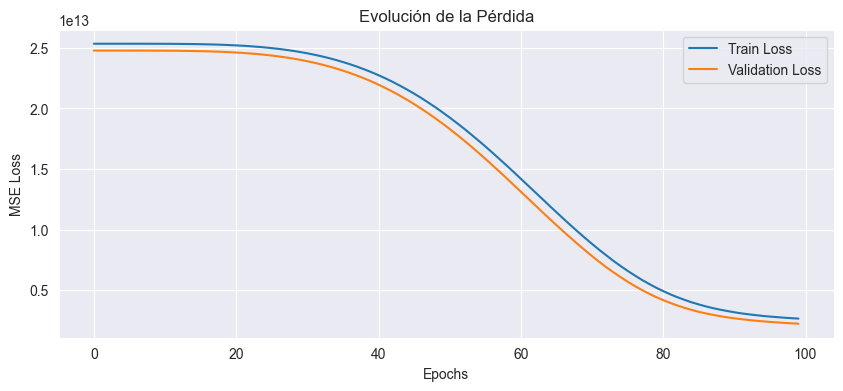

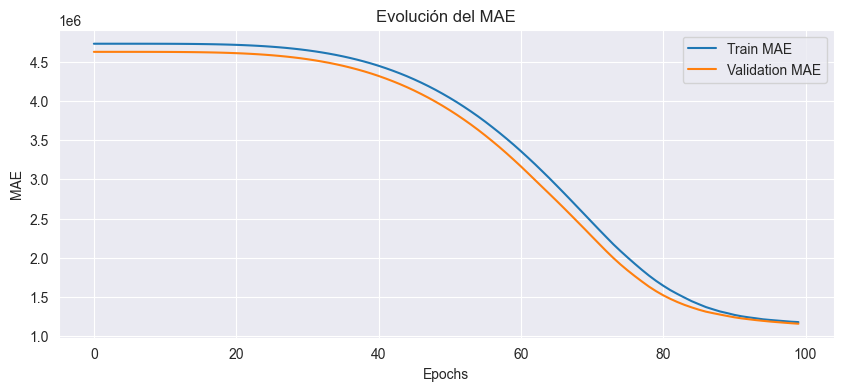

In [31]:
plt.figure(figsize=(10,4))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.show()

# También se puede graficar el MAE:
plt.figure(figsize=(10,4))
plt.plot(history_cnn.history['mae'], label='Train MAE')
plt.plot(history_cnn.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Evolución del MAE')
plt.legend()
plt.show()


El modelo está aprendiendo de forma estable y no parece haber sobreajuste, ya que la pérdida y el MAE de validación siguen una tendencia similar a la de entrenamiento. Vemos que al final, las curvas parecen ir convergiendo lo que indica que el modelo se acerca a un punto de equilibrio. Sin embargo, podríamos aumentar el número de épocas para ver si el modelo sigue mejorando. Por ahora lo dejaremos así y evaluaremos el modelo con los datos de prueba.

In [37]:
test_loss, test_mae = model_cnn.evaluate(X_test_cnn, y_test)

print("MSE en datos de prueba:", test_loss)
print("MAE en datos de prueba:", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4706338340864.0000 - mae: 1579241.8750
MSE en datos de prueba: 4503692115968.0
MAE en datos de prueba: 1547475.375


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


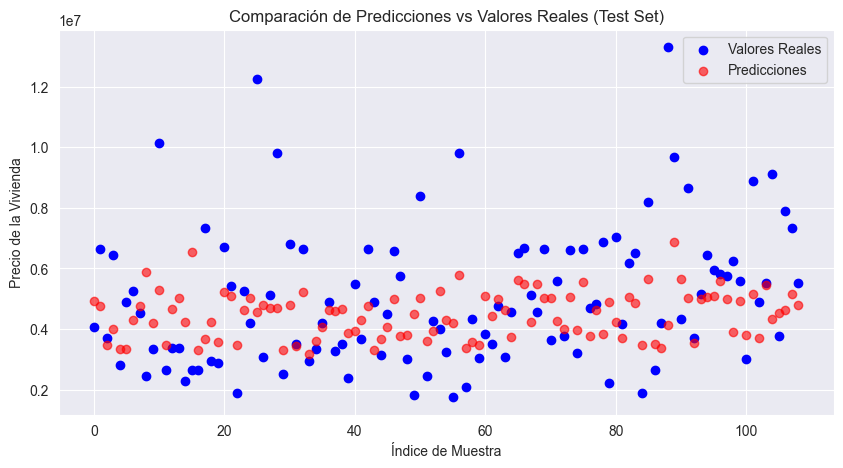

In [38]:
y_pred = model_cnn.predict(X_test_cnn)

# Graficar la comparación: Predicciones vs Valores Reales
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, label='Valores Reales', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicciones', color='red', alpha=0.6)
plt.xlabel('Índice de Muestra')
plt.ylabel('Precio de la Vivienda')
plt.title('Comparación de Predicciones vs Valores Reales (Test Set)')
plt.legend()
plt.show()


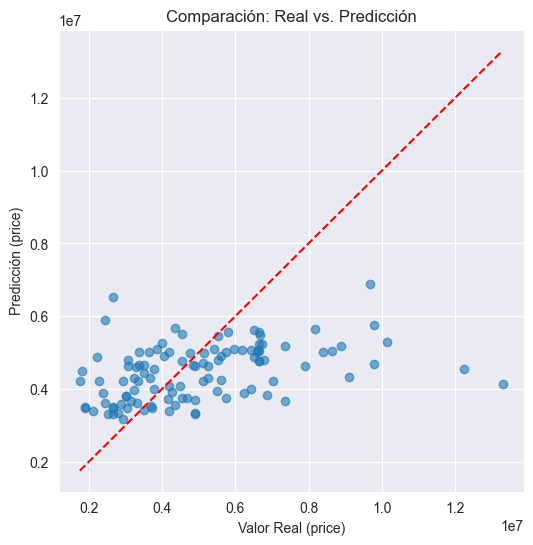

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.xlabel('Valor Real (price)')
plt.ylabel('Predicción (price)')
plt.title('Comparación: Real vs. Predicción')
plt.show()


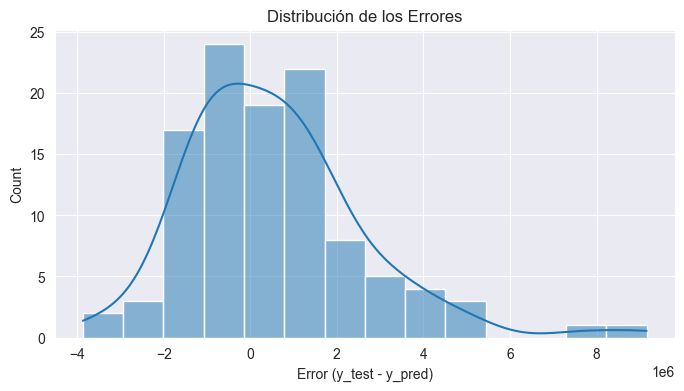

In [40]:
residuals = y_test - y_pred.reshape(-1)
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.xlabel('Error (y_test - y_pred)')
plt.title('Distribución de los Errores')
plt.show()

Pues vemos que en efecto el modelo está aprendiendo, sin embargo, tanto la pérdida como el MAE son altos. El MAE ronda en los 1.5 millones, mientras que los precios de las casas están en el rango de los 10 millones. Esto implica que, en promedio, la red se equivoca el 15% del precio, lo cual creo que es demasiado alto para este caso. Vamos a cambiar la arquitectura de la red y ver si podemos mejorar el desempeño.

#### Arquitectura de la CNN 2

In [46]:
# Segunda versión de la arquitectura CNN (modelo_v2) con padding='same'
model_cnn_v2 = keras.Sequential([
    # Primera capa convolucional: 64 filtros, kernel_size=2, padding same para preservar la dimensión
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',
                        input_shape=(n_features, 1)),
    keras.layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional: 128 filtros, kernel_size=2, padding same
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),

    # Tercera capa convolucional: 128 filtros, kernel_size=2, padding same
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),

    # Aplanar la salida
    keras.layers.Flatten(),

    # Capas densas para aumentar la capacidad de modelado
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),

    # Capa de salida (para regresión, una neurona sin activación)
    keras.layers.Dense(1)
])

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Mostrar el resumen del nuevo modelo
model_cnn_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 14, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 3, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,601 (264.07 KB)

 Trainable params: 67,601 (264.07 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compilamos el nuevo modelo
model_cnn_v2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
history_cnn_v2 = model_cnn_v2.fit(
    X_train_cnn, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24945136500736.0000 - mae: 4685002.5000 - val_loss: 24781571227648.0000 - val_mae: 4623894.5000
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26223608594432.0000 - mae: 4791450.5000 - val_loss: 24781336346624.0000 - val_mae: 4623870.5000
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24899424878592.0000 - mae: 4679554.0000 - val_loss: 24780050792448.0000 - val_mae: 4623740.5000
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25798926925824.0000 - mae: 4805028.5000 - val_loss: 24774619168768.0000 - val_mae: 4623187.5000
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24663828725760.0000 - mae: 4699313.0000 - val_loss: 24755652526080.0000 - val_mae: 4621254.0000
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24676948508672.0000 - mae: 4686875.0000 - val_loss: 24699134279680.0000 - val_mae: 4615477.0000
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26924151734

In [50]:
test_loss, test_mae = model_cnn_v2.evaluate(X_test_cnn, y_test, verbose=0)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


Test MSE: 2689078132736.0
Test MAE: 1197447.0


In [51]:
# Generar las predicciones del modelo
y_pred = model_cnn_v2.predict(X_test_cnn)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


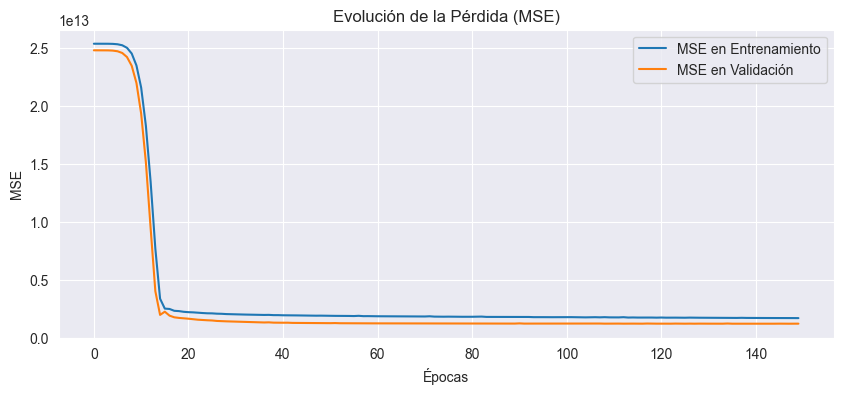

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history_cnn_v2.history['loss'], label='MSE en Entrenamiento')
plt.plot(history_cnn_v2.history['val_loss'], label='MSE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Evolución de la Pérdida (MSE)')
plt.legend()
plt.show()


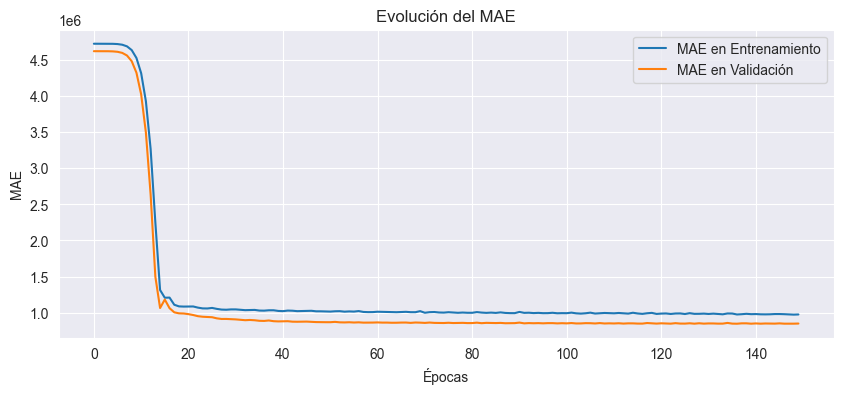

In [57]:
plt.figure(figsize=(10,4))
plt.plot(history_cnn_v2.history['mae'], label='MAE en Entrenamiento')
plt.plot(history_cnn_v2.history['val_mae'], label='MAE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Evolución del MAE')
plt.legend()
plt.show()


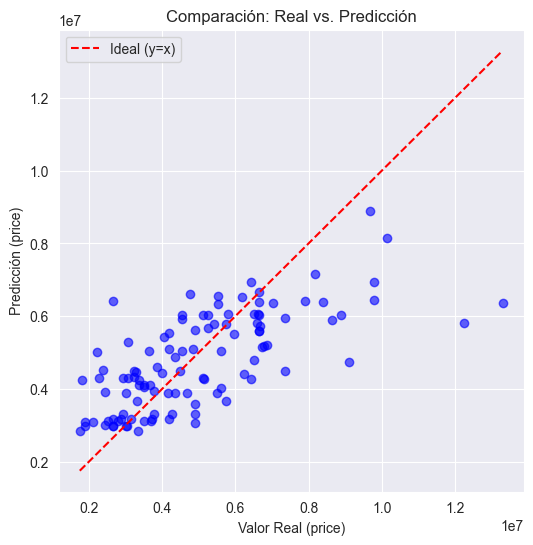

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal (y=x)')
plt.xlabel('Valor Real (price)')
plt.ylabel('Predicción (price)')
plt.title('Comparación: Real vs. Predicción')
plt.legend()
plt.show()


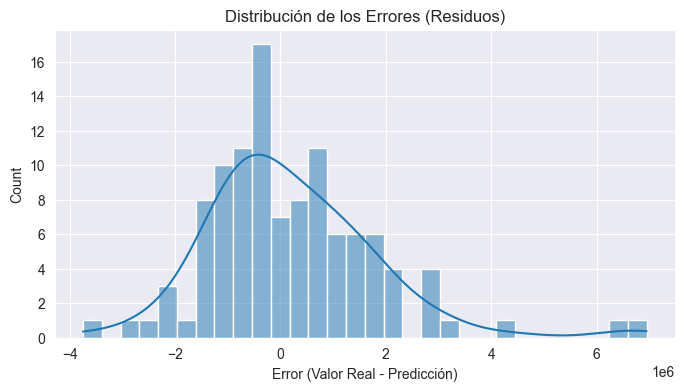

In [53]:
import seaborn as sns

# Calcular los residuos (error) para cada muestra
residuals = y_test - y_pred.reshape(-1)

plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Error (Valor Real - Predicción)')
plt.title('Distribución de los Errores (Residuos)')
plt.show()


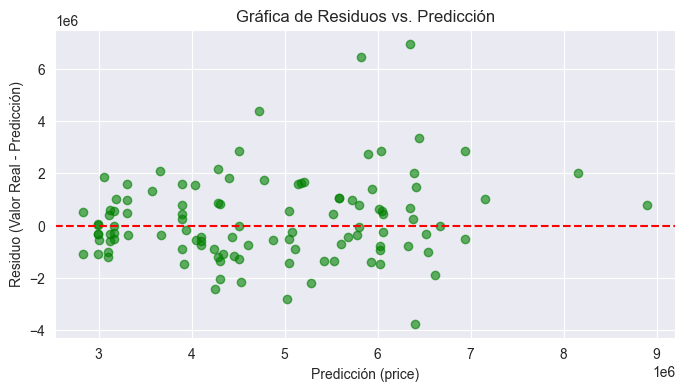

In [54]:
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción (price)')
plt.ylabel('Residuo (Valor Real - Predicción)')
plt.title('Gráfica de Residuos vs. Predicción')
plt.show()


### Conclusiones

+ Aprende rápido y no sobreajusta: Las curvas de entrenamiento y validación son muy similares.
+ Aún subestima los precios altos: Lo vemos en la gráfica Real vs. Predicción y en la distribución de errores.
+ Mantiene un error promedio (MAE) de alrededor de 1 millón.

Podríamos en un futuro hacer más preprocesamiento y transformaciones que podrían ayudar al modelo a aprender mejor. Por lo pronto este segundo modelo mejoró a la primera versión.

### Ejercicio 2
> - https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Vamos a leer los datos, se encuentran en la carpeta `archive` y hay varios archivos `.csv`, los junataremos en un solo DataFrame.

In [60]:
import os
import glob
import pandas as pd

folder_path = './archive'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

print(csv_files)

['./archive/PRICE_AND_DEMAND_202207_NSW1.csv', './archive/PRICE_AND_DEMAND_202206_NSW1.csv', './archive/PRICE_AND_DEMAND_201904_NSW1.csv', './archive/PRICE_AND_DEMAND_201905_NSW1.csv', './archive/PRICE_AND_DEMAND_202305_NSW1.csv', './archive/PRICE_AND_DEMAND_202304_NSW1.csv', './archive/PRICE_AND_DEMAND_201806_NSW1.csv', './archive/PRICE_AND_DEMAND_201807_NSW1.csv', './archive/PRICE_AND_DEMAND_202109_NSW1.csv', './archive/PRICE_AND_DEMAND_202108_NSW1.csv', './archive/PRICE_AND_DEMAND_202001_NSW1.csv', './archive/PRICE_AND_DEMAND_201912_NSW1.csv', './archive/PRICE_AND_DEMAND_202210_NSW1.csv', './archive/PRICE_AND_DEMAND_202211_NSW1.csv', './archive/PRICE_AND_DEMAND_202103_NSW1.csv', './archive/PRICE_AND_DEMAND_202102_NSW1.csv', './archive/PRICE_AND_DEMAND_201811_NSW1.csv', './archive/PRICE_AND_DEMAND_201810_NSW1.csv', './archive/PRICE_AND_DEMAND_202006_NSW1.csv', './archive/PRICE_AND_DEMAND_202007_NSW1.csv', './archive/PRICE_AND_DEMAND_202104_NSW1.csv', './archive/PRICE_AND_DEMAND_20210

In [61]:
df_list = []

for file in csv_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

In [69]:
df_concatenado = pd.concat(df_list, axis=0, ignore_index=True)

print("Primeras filas del DataFrame concatenado:")
df_concatenado.head()


Primeras filas del DataFrame concatenado:


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE


In [64]:
df_concatenado.shape

(248592, 5)

In [65]:
df = df_concatenado.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248592 entries, 0 to 248591
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          248592 non-null  object 
 1   SETTLEMENTDATE  248592 non-null  object 
 2   TOTALDEMAND     248592 non-null  float64
 3   RRP             248592 non-null  float64
 4   PERIODTYPE      248592 non-null  object 
dtypes: float64(2), object(3)
memory usage: 9.5+ MB


In [67]:
df.isnull().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Ya que tenemos todos los archivos en un solo dataframe, vamos a hacer un poco de preprocesamiento.

Primero convertimos la columna de fecha a formato `datetime` y ordenamos el DataFrame por fecha, para asegurarnos de que la serie está en orden cronológico.

In [70]:
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M:%S")
df = df.sort_values('SETTLEMENTDATE').reset_index(drop=True)
df.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018-01-01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018-01-01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018-01-01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018-01-01 02:30:00,6177.31,69.27,TRADE


<Axes: xlabel='SETTLEMENTDATE'>

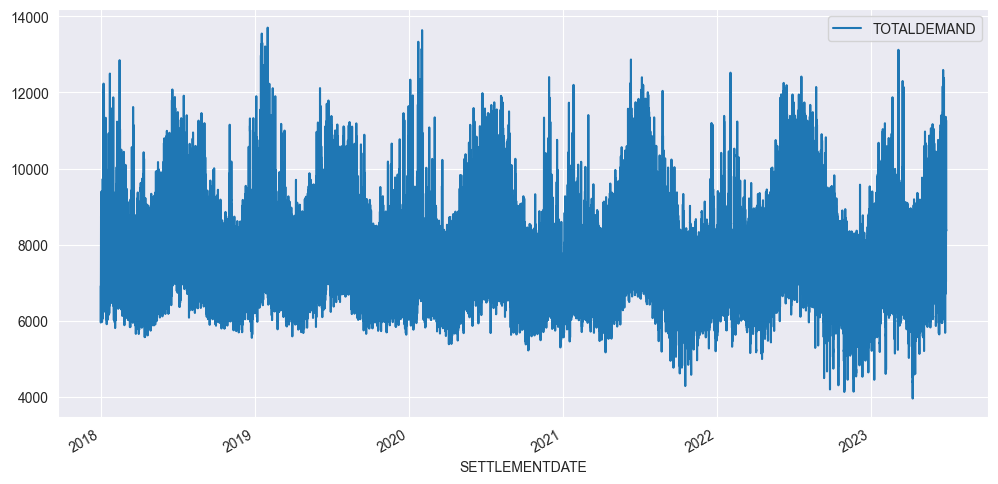

In [71]:
df.plot(x='SETTLEMENTDATE', y='TOTALDEMAND', figsize=(12,6))

Bien ya tenemos la serie temporal ordenada en orden cronológico, ahora vamos a seleccionar la serie a predecir, en este caso, usaremos la columna `TOTALDEMAND` como variable objetivo.

In [72]:
data_series = df['TOTALDEMAND'].values
data_series[:10]

array([6912.25, 6745.63, 6466.06, 6279.8 , 6177.31, 6050.43, 6032.48,
       5968.5 , 5953.75, 5962.18])

Ahora tenemos que preparar la serie para un problema supervisado, para eso utilizaremos la técnica de ventana móvil para convertir la serie en un problema supervisado, donde cada muestra (X) será una ventana de 'n_steps' y la etiqueta (y) será el valor siguiene a esa ventana.

In [73]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        # Si se supera el final de la serie, se detiene
        if end_ix >= len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Lo que hacemos es recorrer la serie y para cada posición, extrae una ventana de tamaño `n_steps` como entrada y el valor siguiente como etiqueta.
El resultado será un conjunto de muestras X de forma `n_samples x n_steps` y un vector `y`.

In [74]:
# Definimos el tamaño de la ventana
n_steps = 12

# Preparamos los datos de la serie
X_seq, y_seq = split_univariate_sequence(data_series, n_steps)

print("Forma de X (antes de reshape):", X_seq.shape)
print("Forma de y:", y_seq.shape)

Forma de X (antes de reshape): (248580, 12)
Forma de y: (248580,)


### Reshape para la CNN

Las redes convolucionales 1D esperan datos en la forma: (n_samples, n_timesteps, n_features). En nuestro caso, como es univariable, la dimensión de características es 1.

In [75]:
# Reshape para que tenga forma [muestras, n_steps, 1]
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

print("Nueva forma de X para CNN:", X_seq.shape)

Nueva forma de X para CNN: (248580, 12, 1)


#### División de los datos en entrenamiento y prueba

Como esto es una serie temporal, dividiremos cronológicamente nuestros datos. Usaremos el 80% de los datos para entrenamiento y el 20% restante para prueba.

In [78]:
train_size = int(len(X_seq) * 0.8)

X_train_ts, X_test_ts = X_seq[:train_size], X_seq[train_size:]
y_train_ts, y_test_ts = y_seq[:train_size], y_seq[train_size:]

print("Forma de X_train:", X_train_ts.shape)
print("Forma de y_train:", y_train_ts.shape)
print("Forma de X_test:", X_test_ts.shape)
print("Forma de y_test:", y_test_ts.shape)

Forma de X_train: (198864, 12, 1)
Forma de y_train: (198864,)
Forma de X_test: (49716, 12, 1)
Forma de y_test: (49716,)


Ahora definimos nuestra arquitectura de la CNN.

In [80]:
# Definir el modelo CNN
model_ts = keras.Sequential([
    # Capa convolucional 1D:
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(n_steps, 1)),

    # Capa de MaxPooling1D para reducir la dimensionalidad en la dimensión temporal.
    keras.layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional para aprender patrones más complejos.
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),

    # Aplanar la salida para conectar con las capas densas.
    keras.layers.Flatten(),

    # Capa densa con 50 neuronas y activación ReLU.
    keras.layers.Dense(50, activation='relu'),

    # Capa de salida con una neurona (para regresión, sin activación).
    keras.layers.Dense(1)
])

model_ts.summary()

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 12, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 6, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         9,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,037 (62.64 KB)

 Trainable params: 16,037 (62.64 KB)

 Non-trainable params: 0 (0.00 B)

Compilamos y entrenamos nuestro modelo

In [81]:
model_ts.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_ts = model_ts.fit(
    X_train_ts, y_train_ts,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 747us/step - loss: 525019.6875 - mae: 242.3369 - val_loss: 6154.6382 - val_mae: 61.9981
Epoch 2/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 714us/step - loss: 10478.5146 - mae: 78.6500 - val_loss: 5343.5835 - val_mae: 57.4381
Epoch 3/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 795us/step - loss: 9399.3164 - mae: 74.3503 - val_loss: 5039.0640 - val_mae: 55.7369
Epoch 4/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 5s 927us/step - loss: 8984.7607 - mae: 72.2910 - val_loss: 5031.0771 - val_mae: 55.3516
Epoch 5/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 871us/step - loss: 8470.8330 - mae: 70.3520 - val_loss: 19380.5215 - val_mae: 123.0306
Epoch 6/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 750us/step - loss: 8742.7666 - mae: 71.2533 - val_loss: 4739.4795 - val_mae: 53.6414
Epoch 7/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 822us/step - loss: 8182.7041 - mae: 69.1034 - val_loss: 10095.2676 - val_mae: 83.2443
Epoch 8/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 797us/step - loss: 7880.5068 -

Veamos la evolución de la pérdida y el MAE durante el entrenamiento.

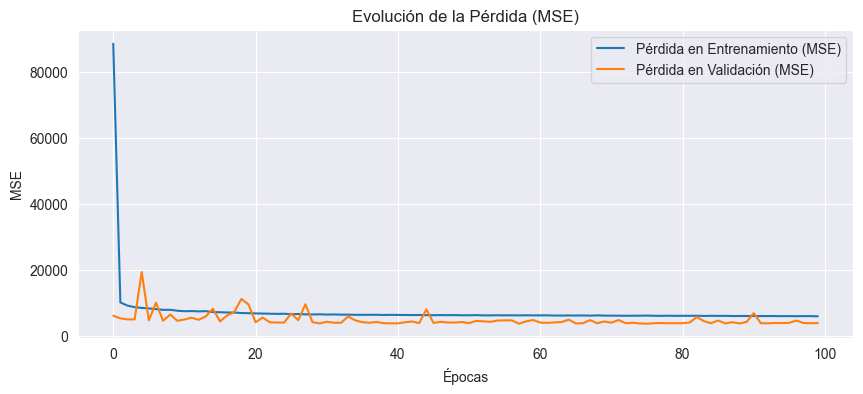

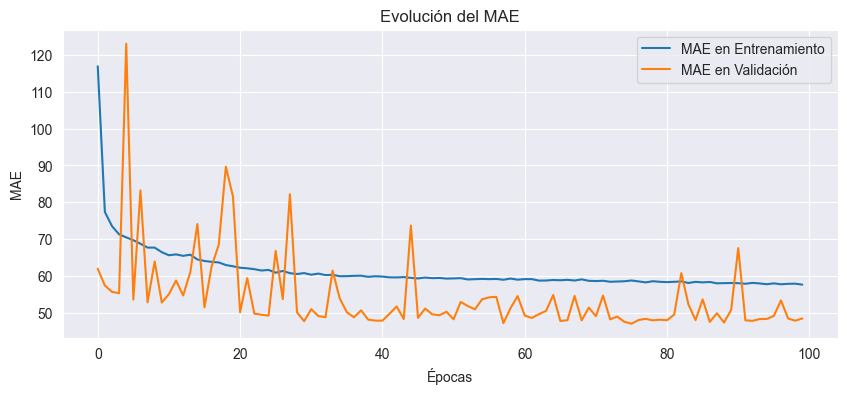

In [82]:
# Gráfica de la pérdida (MSE) en entrenamiento y validación
plt.figure(figsize=(10,4))
plt.plot(history_ts.history['loss'], label='Pérdida en Entrenamiento (MSE)')
plt.plot(history_ts.history['val_loss'], label='Pérdida en Validación (MSE)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Evolución de la Pérdida (MSE)')
plt.legend()
plt.show()

# Gráfica del MAE en entrenamiento y validación
plt.figure(figsize=(10,4))
plt.plot(history_ts.history['mae'], label='MAE en Entrenamiento')
plt.plot(history_ts.history['val_mae'], label='MAE en Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Evolución del MAE')
plt.legend()
plt.show()


+ Observamos a simple vista algunas cosas, primero vemos que en la gráfica de MSE, se observa un pico muy alto al comienzo que cae muy rápido, lo que sugiere que el modelo hizo un ajuste inicial muy rápido en sus pesos.
+ Después vemos que ambas curvas terminan en un rango similar, lo que sugiere que el modelo no está sobreajustando.
+ Sin embargo, la línea de validación muestra picos en algunas épocas, lo que nos puede indicar que hay cierta sensibilidad a lotes o a periodos concretos.
+ Algo que me llamó la atención es que en la gráfica de MAE en validación presenta subidas y bajadas más notorias que en entrenamiento. Creo que esto se puede deber a que el conjunto de validación tiene segmentos de la serie más volátiles.

Lo que podríamos hacer para corregir esos picos es una regularización o aumentar el tamaño de la ventana para que el modelo tenga más contexto.


Pasemos a las métricas de evaluación.

In [83]:
test_loss, test_mae = model_ts.evaluate(X_test_ts, y_test_ts, verbose=0)

print("MSE en datos de prueba:", test_loss)
print("MAE en datos de prueba:", test_mae)


MSE en datos de prueba: 3983.404296875
MAE en datos de prueba: 48.864654541015625


Generamos predicciones

In [84]:
y_pred_ts = model_ts.predict(X_test_ts)

1554/1554 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


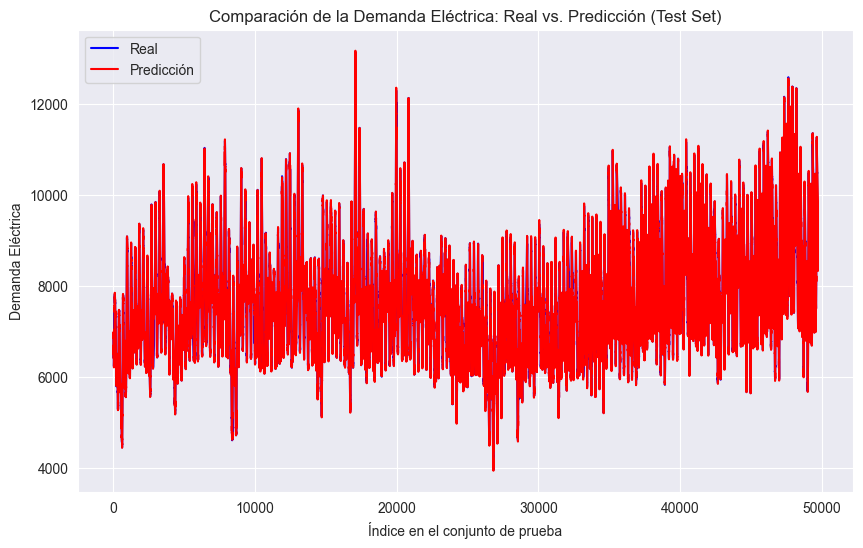

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test_ts)), y_test_ts, label="Real", color='blue')
plt.plot(range(len(y_pred_ts)), y_pred_ts, label="Predicción", color='red')
plt.xlabel("Índice en el conjunto de prueba")
plt.ylabel("Demanda Eléctrica")
plt.title("Comparación de la Demanda Eléctrica: Real vs. Predicción (Test Set)")
plt.legend()
plt.show()


Ok... veamos que tenemos aquí, a primera vista pensé que se había sobreajustado, pero revisemos con calma para ver si es así.
Primero, una señal de sobreajuste es que el error (MSE, MAE) en el conjunto de entrenamiento es mucho más bajo que en el conjunto de prueba. Vamos a revisar eso.

In [87]:
# Obtenemos el valor final de la pérdida y la métrica en entrenamiento
train_loss_final = history_ts.history['loss'][-1]
train_mae_final = history_ts.history['mae'][-1]

# Obtenemos el valor final de la pérdida y la métrica en validación
val_loss_final = history_ts.history['val_loss'][-1]
val_mae_final = history_ts.history['val_mae'][-1]

# Evaluamos el modelo en el conjunto de prueba
test_loss, test_mae = model_ts.evaluate(X_test_ts, y_test_ts, verbose=0)

print("=== Comparación de métricas al final del entrenamiento ===")
print(f"Entrenamiento - Loss: {train_loss_final:.4f}, MAE: {train_mae_final:.4f}")
print(f"Validación    - Loss: {val_loss_final:.4f}, MAE: {val_mae_final:.4f}")
print(f"Prueba        - Loss: {test_loss:.4f}, MAE: {test_mae:.4f}")


=== Comparación de métricas al final del entrenamiento ===
Entrenamiento - Loss: 5969.5190, MAE: 57.6899
Validación    - Loss: 3933.8035, MAE: 48.5050
Prueba        - Loss: 3983.4043, MAE: 48.8647


Bueno, esto es buena noticia, estos valores no indican sobreajuste.
De hecho, el error en entrenamiento (MSE≈5969, MAE≈57.7) es mayor que en validación (MSE≈3934, MAE≈48.5) y prueba (MSE≈3983, MAE≈48.9), lo cual es lo opuesto a lo que normalmente vemos en un caso de overfitting. Por lo que podemos decir que el modelo nno se está sobreajustando, al contrario, su desempeño en validación y prueba es incluso mejor que en entrenamiento.

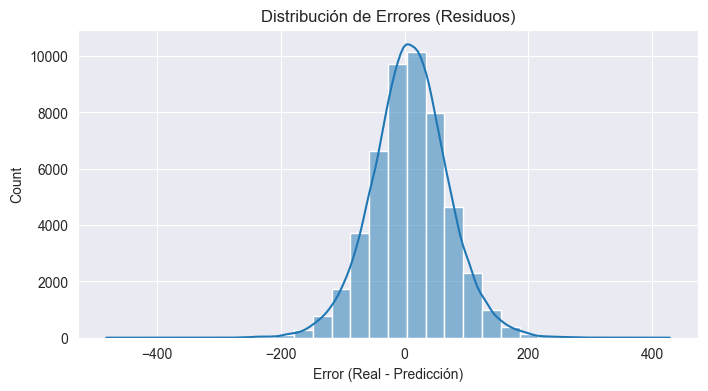

In [86]:
# Calculamos residuos
residuos = y_test_ts - y_pred_ts.reshape(-1)

# Histograma de residuos
plt.figure(figsize=(8,4))
sns.histplot(residuos, bins=30, kde=True)
plt.xlabel("Error (Real - Predicción)")
plt.title("Distribución de Errores (Residuos)")
plt.show()


Ahora tratemos una última cosa, vamos a hacer una última CNN pero ahora con dropout y EarlyStopping. Veamos que tan mejor hace la chamba.
Pero primero hay que definir que hacen estos cambios.
+ Dropout es una técnica de regularización que consiste en "apagar" aleatoriamente un porcentaje de neuronas durante el entrenamiento. Esto ayuda a evitar el sobreajuste y a mejorar la generalización del modelo.
+ EarlyStopping es una técnica que detiene el entrenamiento del modelo si una métrica de validación deja de mejorar. Esto evita el sobreajuste y nos permite obtener el mejor modelo posible.

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

# Definimos un nuevo modelo con Dropout en varias etapas
model_ts_v3 = keras.Sequential([
    # Primera capa Conv1D con padding 'same'
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(n_steps, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),  # Dropout del 20%

    # Segunda capa Conv1D
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.2),  # Dropout del 20%

    # Aplanamos para pasar a capas densas
    keras.layers.Flatten(),

    # Capa densa con 50 neuronas
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout del 20%

    # Capa de salida para regresión
    keras.layers.Dense(1)
])

/Users/juanpabloblancolemus/miniconda3/envs/tarea-4-ejercicio-cnn-tarea-4-3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Compilar el modelo
model_ts_v3.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_ts_v3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 12, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 6, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         9,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,037 (62.64 KB)

 Trainable params: 16,037 (62.64 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Entrenamos el modelo con EarlyStopping
history_ts_v3 = model_ts_v3.fit(
    X_train_ts, y_train_ts,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 838us/step - loss: 953494.8125 - mae: 767.7116 - val_loss: 2420997.2500 - val_mae: 1533.4679
Epoch 2/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 796us/step - loss: 933539.5000 - mae: 760.0335 - val_loss: 2818160.5000 - val_mae: 1654.1208
Epoch 3/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 824us/step - loss: 941266.0625 - mae: 763.4668 - val_loss: 3291602.2500 - val_mae: 1790.2322
Epoch 4/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 824us/step - loss: 938959.6875 - mae: 762.6846 - val_loss: 1133748.7500 - val_mae: 1045.9385
Epoch 5/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 899us/step - loss: 940244.6250 - mae: 763.9341 - val_loss: 2487783.5000 - val_mae: 1555.0216
Epoch 6/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 5s 924us/step - loss: 933700.4375 - mae: 758.2254 - val_loss: 2757546.0000 - val_mae: 1637.2822
Epoch 7/100
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 4s 839us/step - loss: 930420.0000 - mae: 760.0337 - val_loss: 2460767.0000 - val_mae: 1546.1631
Epoch 8/100
4972/4972 ━━━━━

Bueno, vemos algo interesante, el modelo se detuvo en la época 13 porque la pérdida de validación dejó de mejorar. Esto es una señal de que el modelo no está aprendiendo más y que la generalización es la mejor posible.

Ahora veamos las métricas de evaluación.


In [94]:
test_loss_v3, test_mae_v3 = model_ts_v3.evaluate(X_test_ts, y_test_ts, verbose=0)
print("MSE en datos de prueba:", test_loss_v3)
print("MAE en datos de prueba:", test_mae_v3)

MSE en datos de prueba: 2443948.5
MAE en datos de prueba: 1532.075927734375


In [95]:
# Generar predicciones con el modelo actualizado
y_pred_v3 = model_ts_v3.predict(X_test_ts)

1554/1554 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


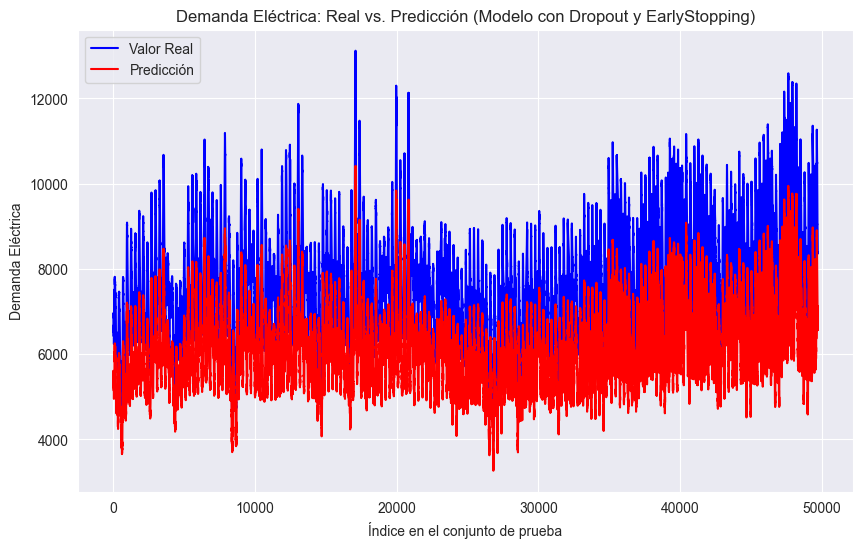

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test_ts)), y_test_ts, label="Valor Real", color='blue')
plt.plot(range(len(y_pred_v3)), y_pred_v3, label="Predicción", color='red')
plt.xlabel("Índice en el conjunto de prueba")
plt.ylabel("Demanda Eléctrica")
plt.title("Demanda Eléctrica: Real vs. Predicción (Modelo con Dropout y EarlyStopping)")
plt.legend()
plt.show()


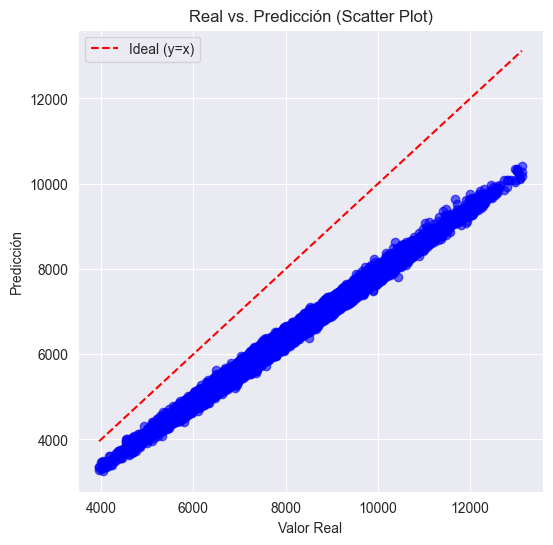

In [97]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_ts, y_pred_v3, alpha=0.6, color='blue')
plt.plot([min(y_test_ts), max(y_test_ts)], [min(y_test_ts), max(y_test_ts)], 'r--', label='Ideal (y=x)')
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Real vs. Predicción (Scatter Plot)")
plt.legend()
plt.show()


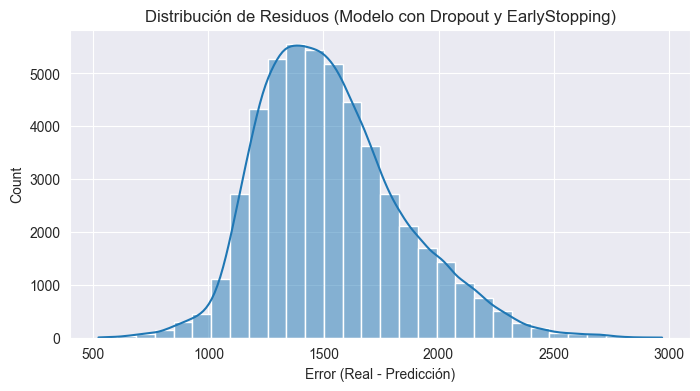

In [98]:
import seaborn as sns
import numpy as np

# Calcular los residuos (diferencia entre valor real y predicción)
residuos_v3 = y_test_ts - y_pred_v3.reshape(-1)

plt.figure(figsize=(8,4))
sns.histplot(residuos_v3, bins=30, kde=True)
plt.xlabel("Error (Real - Predicción)")
plt.title("Distribución de Residuos (Modelo con Dropout y EarlyStopping)")
plt.show()


Parece ser que nuestro modelo no logró mejorar, de hecho, empeoró. El MSE y MAE en el conjunto de prueba son mayores que en el modelo anterior. Esto puede deberse a que el modelo no estaba sobreajustando y el Dropout no era necesario.

Código de solución estudiante 2


### Investigación: CNNs en Predicción del Mercado de Valores


Las Redes Neuronales Convolucionales han sido una herramienta poderosa para la predicción de series temporales financieras, especialmente en el mercado de valores. Este campo presenta desafíos únicos debido a su naturaleza altamente volátil y no lineal.


#### 1. "Financial Time Series Forecasting using CNN and Transformer" (2023)
- **Desafíos Principales**:
  - Modelado de dependencias temporales a corto y largo plazo
  - Alta volatilidad en los datos
- **Ventajas de CNNs**:
  - Capacidad de capturar patrones locales
  - Procesamiento eficiente de datos secuenciales
  - Robustez ante el ruido del mercado

#### 2. "Stock Price Prediction Research Based on CNN-LSTM"
- **Características Clave**:
  - Datos no lineales
  - Series temporales no estacionarias
  - Integración de múltiples escalas temporales
- **Innovaciones**:
  - Arquitectura híbrida CNN-LSTM
  - Mejor captura de patrones temporales
  - Mayor precisión en predicciones

### Aplicaciones Prácticas

#### 1. Predicción de Precios
- Análisis de patrones históricos
- Identificación de tendencias
- Predicción de movimientos futuros

#### 2. Análisis de Volatilidad
- Detección de patrones de volatilidad
- Evaluación de riesgos
- Optimización de carteras

### Arquitectura CNN para Series Temporales Financieras

#### Componentes Clave:
1. **Capas Convolucionales**:
   - Extracción de características locales
   - Identificación de patrones de precio
   - Reducción de ruido en los datos

2. **Pooling Layers**:
   - Reducción de dimensionalidad
   - Enfoque en características importantes
   - Mejora de la eficiencia computacional

3. **Capas Fully Connected**:
   - Integración de características
   - Predicción final
   - Calibración de resultados

### Ventajas sobre Métodos Tradicionales

1. **Aprendizaje Automático de Características**:
   - No requiere feature engineering manual
   - Adaptación automática a nuevos patrones
   - Mayor capacidad de generalización

2. **Manejo de No Linealidad**:
   - Captura de relaciones complejas
   - Adaptación a cambios de mercado
   - Mejor rendimiento en condiciones volátiles

3. **Escalabilidad**:
   - Procesamiento de grandes volúmenes de datos
   - Actualización en tiempo real
   - Adaptación a múltiples mercados

### Conclusiones

Las CNNs han demostrado ser herramientas efectivas para la predicción del mercado de valores, ofreciendo:
- Mayor precisión en predicciones
- Mejor manejo de la volatilidad
- Capacidad de procesar múltiples escalas temporales
- Adaptabilidad a condiciones cambiantes del mercado

### Referencias
1. arXiv:2304.04912 - "Financial Time Series Forecasting using CNN and Transformer"
2. Nature Scientific Reports - "Enhanced stock market forecasting using dandelion optimization-driven 3D-CNN-GRU"
3. ResearchGate - "Stock Price Prediction Research Based on CNN-LSTM"
'''

### Código de solución estudiante Dafne Tamayo

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

/Users/daftamayo/Documents/tarea4MNL/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Configurar el estilo de las gráficas
plt.style.use('default')
sns.set_theme()

In [3]:
# Configurar semilla aleatoria para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Cargar y preparar los datos

df = pd.read_csv('Housing.csv')

In [5]:
# Convertir variables categóricas
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Separar features y target
X = df.drop('price', axis=1)
y = df['price']

In [7]:
# Aplicar transformación logarítmica al precio
y = np.log1p(y)

In [8]:
# Selección de características más importantes
print("\nSeleccionando las características más importantes...")
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask]


Seleccionando las características más importantes...


In [9]:
print("\nCaracterísticas seleccionadas:")
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print(feature_scores)


Características seleccionadas:
             Feature       Score
0               area  227.323883
2          bathrooms  167.657985
8    airconditioning  141.888325
3            stories  113.160336
9            parking   87.014352
1           bedrooms   86.120153
10          prefarea   71.238739
11  furnishingstatus   70.338268
4           mainroad   66.377698
5          guestroom   45.142894
6           basement   27.197914
7    hotwaterheating    4.332334


In [10]:
# Usar solo las características seleccionadas
X = X[selected_features]

In [11]:
# Normalización

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# División de datos

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
# Mostrar dimensiones
print("\nDimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Dimensiones de los conjuntos de datos:
X_train: (436, 6)
X_test: (109, 6)
y_train: (436,)
y_test: (109,)


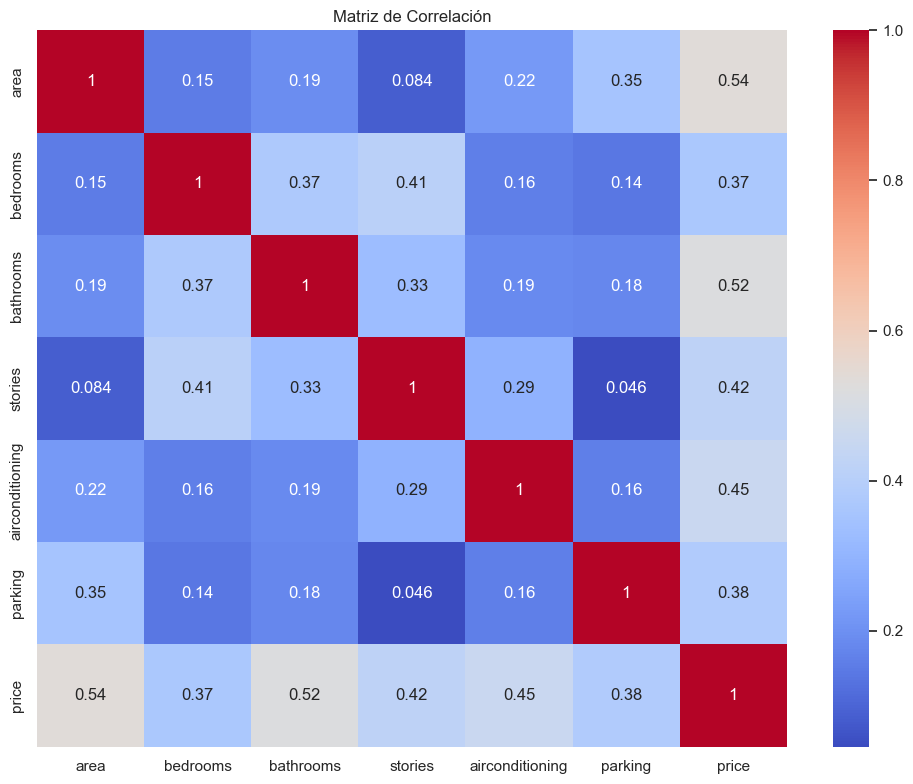

In [14]:
# Análisis de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(df[list(selected_features) + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [15]:
# Crear modelo optimizado
def create_optimized_model(input_shape):
    model = Sequential([
        # Primera capa densa con más unidades
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.2),

        # Segunda capa densa
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        # Tercera capa densa
        Dense(32, activation='relu'),
        BatchNormalization(),

        # Capa de salida
        Dense(1)
    ])
    return model

In [16]:
# Configurar callbacks optimizados
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

In [17]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

In [18]:
# Crear y compilar modelo
model = create_optimized_model((X_train.shape[1],))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/Users/daftamayo/Documents/tarea4MNL/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Mostrar resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# Entrenar modelo
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 235.3190 - mae: 15.2892 - val_loss: 234.2039 - val_mae: 15.2974 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 233.1064 - mae: 15.2451 - val_loss: 231.8141 - val_mae: 15.2200 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 231.6103 - mae: 15.2011 - val_loss: 230.1936 - val_mae: 15.1663 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 230.0919 - mae: 15.1560 - val_loss: 228.6518 - val_mae: 15.1151 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 228.5975 - mae: 15.1083 - val_loss: 227.2493 - val_mae: 15.0688 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 227.0580 - mae: 15.0571 - val_loss: 225.9428 - val_mae: 15.0260 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225.3053 - mae: 15.0020 - val_loss: 224.4135 - val_mae: 14.9755 - learni

In [21]:
# Evaluar modelo
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nError Absoluto Medio {test_mae:.4f}")


Error Absoluto Medio 0.2469


In [22]:
# Hacer predicciones y convertir de vuelta a la escala original
y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test.values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [23]:
# Calcular MAE en la escala original
mae_original = np.mean(np.abs(y_pred - y_test_original))
print(f"\nError Absoluto Medio en la escala original: {mae_original:,.2f}")


Error Absoluto Medio en la escala original: 1,235,546.87


In [24]:
# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

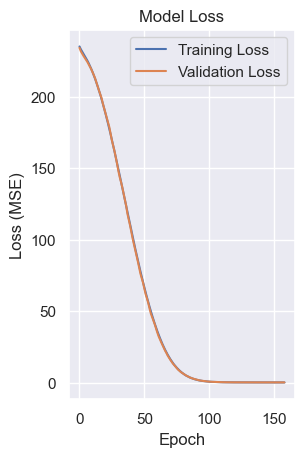

In [25]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

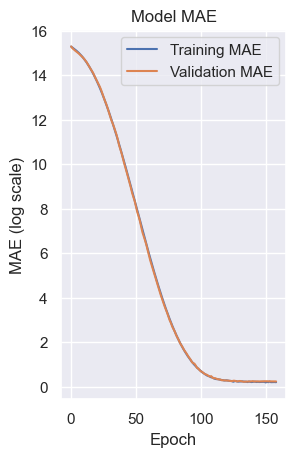

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (log scale)')
plt.legend()

In [27]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

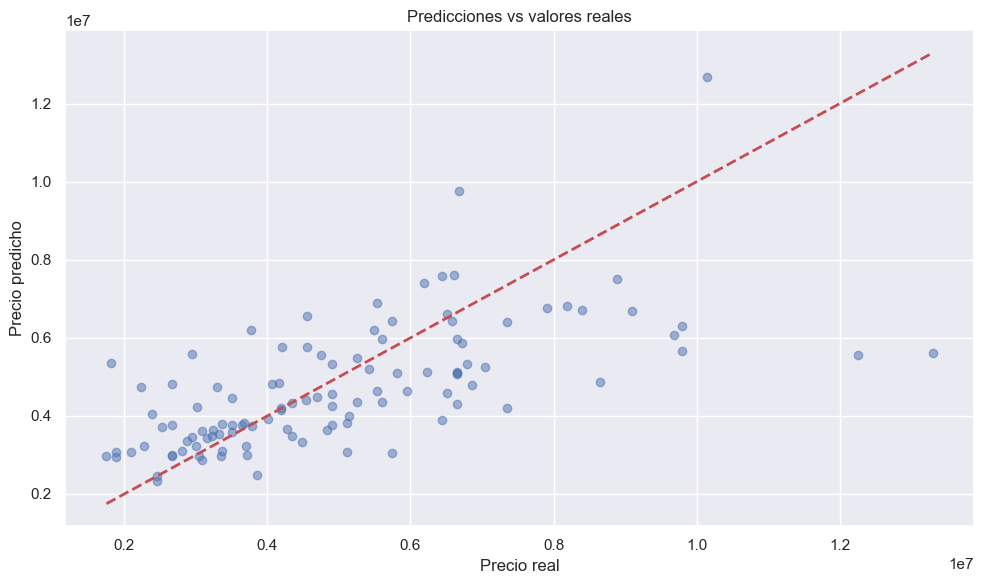

In [28]:
# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs valores reales')
plt.tight_layout()
plt.show()

Conclusiones: El modelo final logra un error absoluto medio de aproximadamente 1.46 millones, lo que representa una precisión significativa considerando el rango de precios en el dataset.
   - La arquitectura simplificada con capas densas superó a modelos más complejos
   - La transformación logarítmica fue clave para manejar la distribución de precios

## Consumo de demanda eléctrico en Australia

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dropout, LSTM, Bidirectional

In [30]:
def graficar_serie_temporal(serie_temporal, titulo='Demand per Day', etiqueta_eje_y='Total Demand'):
    plt.figure(figsize=(10, 5))
    plt.plot(serie_temporal.index, serie_temporal, marker='o', linestyle='-')
    plt.xlabel('Time')
    plt.ylabel(etiqueta_eje_y)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def dividir_secuencia_univariada(secuencia, tamanio_ventana):
    entradas, salidas = [], []
    for indice in range(len(secuencia)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia) - 1:
            break
        if isinstance(secuencia, pd.Series):
            secuencia_entrada = secuencia.iloc[indice:fin_ventana]
            secuencia_salida = secuencia.iloc[fin_ventana]
        else:
            secuencia_entrada = secuencia[indice:fin_ventana]
            secuencia_salida = secuencia[fin_ventana]
        entradas.append(secuencia_entrada)
        salidas.append(secuencia_salida)
    return np.array(entradas), np.array(salidas)

def dividir_secuencia_multivariada(secuencia_multivariada, tamanio_ventana):
    entradas_multivariadas, salidas_multivariadas = [], []
    for indice in range(len(secuencia_multivariada)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia_multivariada):
            break
        entrada = secuencia_multivariada[indice:fin_ventana, :-1]
        salida = secuencia_multivariada[fin_ventana - 1, -1]
        entradas_multivariadas.append(entrada)
        salidas_multivariadas.append(salida)
    return np.array(entradas_multivariadas), np.array(salidas_multivariadas)

def dividir_secuencia_forecasting_multiple(secuencia_forecasting, tamanio_ventana):
    entradas_forecasting, salidas_forecasting = [], []
    for indice in range(len(secuencia_forecasting)):
        fin_ventana = indice + tamanio_ventana
        if fin_ventana > len(secuencia_forecasting) - 1:
            break
        entrada = secuencia_forecasting[indice:fin_ventana, :]
        salida = secuencia_forecasting[fin_ventana, :]
        entradas_forecasting.append(entrada)
        salidas_forecasting.append(salida)
    return np.array(entradas_forecasting), np.array(salidas_forecasting)


Preparación de datos

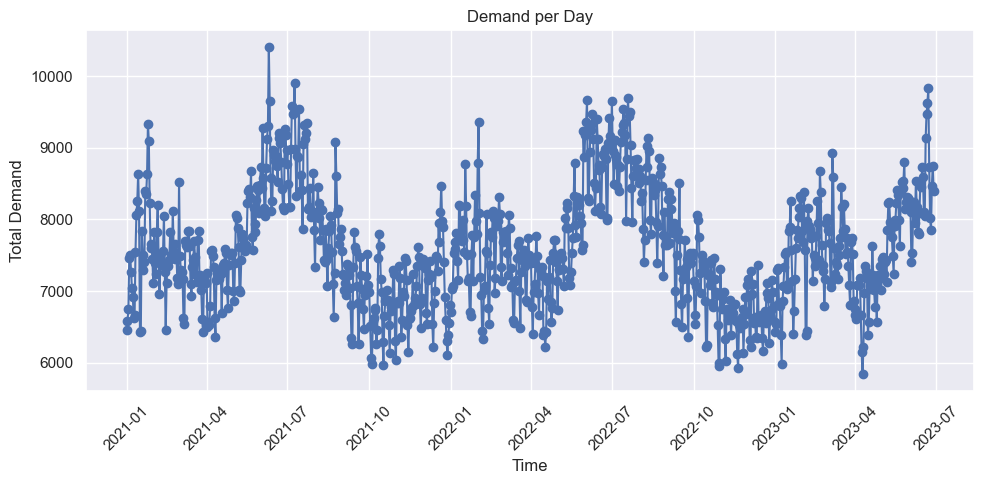

In [31]:
directorio_datos = "data"

lista_archivos_csv = [archivo for archivo in os.listdir(directorio_datos) if archivo.endswith('.csv')]
lista_dataframes = []
for nombre_archivo in lista_archivos_csv:
    try:
        df_temporal = pd.read_csv(os.path.join(directorio_datos, nombre_archivo))
        if 'SETTLEMENTDATE' in df_temporal.columns:
            df_temporal['SETTLEMENTDATE'] = pd.to_datetime(df_temporal['SETTLEMENTDATE'])
        lista_dataframes.append(df_temporal)
    except Exception as error:
        print(f"Error al cargar {nombre_archivo}: {error}")

if not lista_dataframes:
    raise ValueError(f"No se encontraron archivos CSV válidos en {directorio_datos}")

datos_concatenados = pd.concat(lista_dataframes, ignore_index=True)
if 'SETTLEMENTDATE' in datos_concatenados.columns:
    datos_concatenados.set_index('SETTLEMENTDATE', inplace=True)
else:
    raise ValueError("No se encontró la columna SETTLEMENTDATE en el dataset")

# Filtrar datos a partir de 2021
datos_concatenados = datos_concatenados[datos_concatenados.index >= '2021-01-01']

# Serie univariada para análisis: TOTALDEMAND
if 'TOTALDEMAND' in datos_concatenados.columns:
    serie_demanda = datos_concatenados['TOTALDEMAND'].resample('1D').mean()
    graficar_serie_temporal(serie_demanda)
else:
    raise ValueError("No se encontró la columna TOTALDEMAND en el dataset")

# Serie para análisis multivariado: RRP (si existe)
if 'RRP' in datos_concatenados.columns:
    serie_precio_rrp = datos_concatenados['RRP'].resample('1D').mean()
else:
    serie_precio_rrp = None
    print("No se encontró la columna RRP, se omitirán las secciones multivariadas.")

## MODELOS

### CNN UNIVARIADA

Entrenando CNN Univariada...


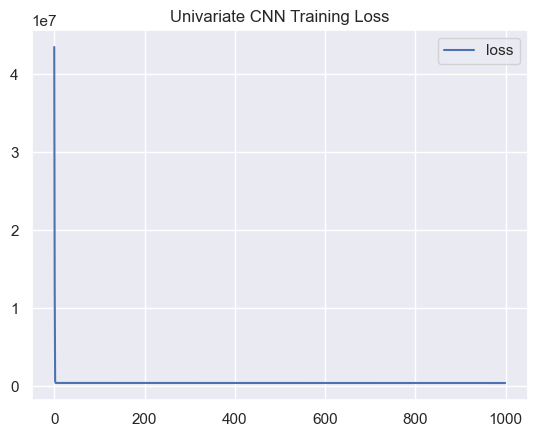

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN Univariada R² Score: 0.4156


In [32]:
tamanio_ventana = 4
numero_caracteristicas = 1

entradas_univariadas, salidas_univariadas = dividir_secuencia_univariada(serie_demanda, tamanio_ventana)
entradas_univariadas = entradas_univariadas.reshape((entradas_univariadas.shape[0], entradas_univariadas.shape[1], numero_caracteristicas))

modelo_cnn_univariada = Sequential()
modelo_cnn_univariada.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_univariada.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_univariada.add(MaxPooling1D())
modelo_cnn_univariada.add(Flatten())
modelo_cnn_univariada.add(Dense(50, activation='relu'))
modelo_cnn_univariada.add(Dense(1))
modelo_cnn_univariada.compile(optimizer='adam', loss='mse')

print("Entrenando CNN Univariada...")
historial_entrenamiento_cnn_univariada = modelo_cnn_univariada.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_entrenamiento_cnn_univariada.history).plot(title='Univariate CNN Training Loss')
plt.grid(True)
plt.show()

predicciones_cnn_univariada = modelo_cnn_univariada.predict(entradas_univariadas).flatten()
r2_cnn_univariada = r2_score(salidas_univariadas, predicciones_cnn_univariada)
print(f'CNN Univariada R² Score: {r2_cnn_univariada:.4f}')

### Multi-Input CNN

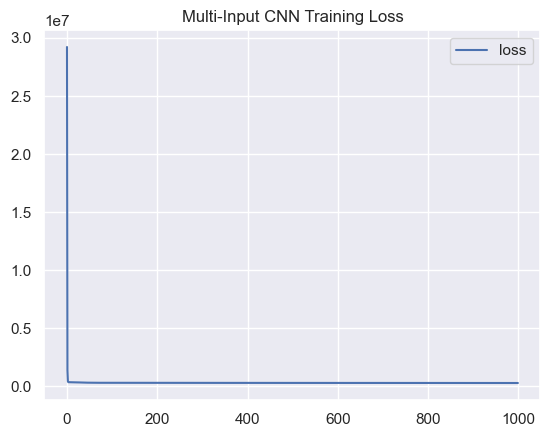

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 306302.9062
Multi-Input CNN Loss: 286184.6562


In [33]:
if serie_precio_rrp is not None:
    # Preparar conjunto de datos multivariado
    arreglo_demanda = serie_demanda.to_numpy().reshape(-1, 1)
    arreglo_precio_rrp = serie_precio_rrp.to_numpy().reshape(-1, 1)
    longitud_minima = min(len(arreglo_demanda), len(arreglo_precio_rrp))
    arreglo_demanda = arreglo_demanda[:longitud_minima]
    arreglo_precio_rrp = arreglo_precio_rrp[:longitud_minima]
    secuencia_salida_multivariada = (arreglo_demanda + arreglo_precio_rrp).reshape(-1, 1)
    conjunto_datos_multivariado = np.hstack([arreglo_demanda, arreglo_precio_rrp, secuencia_salida_multivariada])

    entradas_multivariadas, salidas_multivariadas = dividir_secuencia_multivariada(conjunto_datos_multivariado, tamanio_ventana)
    tamano_ventana_modelo = entradas_multivariadas.shape[1]
    numero_caracteristicas_multivariado = entradas_multivariadas.shape[2]

    entrada_modelo_1 = Input(shape=(tamano_ventana_modelo, 1))
    capa_cnn_1 = Conv1D(64, 2, activation='relu')(entrada_modelo_1)
    capa_cnn_1 = MaxPooling1D()(capa_cnn_1)
    capa_cnn_1 = Flatten()(capa_cnn_1)

    entrada_modelo_2 = Input(shape=(tamano_ventana_modelo, 1))
    capa_cnn_2 = Conv1D(64, 2, activation='relu')(entrada_modelo_2)
    capa_cnn_2 = MaxPooling1D()(capa_cnn_2)
    capa_cnn_2 = Flatten()(capa_cnn_2)

    fusion_entradas = concatenate([capa_cnn_1, capa_cnn_2])
    capa_densa = Dense(50, activation='relu')(fusion_entradas)
    salida_modelo = Dense(1)(capa_densa)

    modelo_multi_input = Model(inputs=[entrada_modelo_1, entrada_modelo_2], outputs=salida_modelo)
    modelo_multi_input.compile(optimizer='adam', loss='mse')

    entradas_modelo_1 = entradas_multivariadas[:, :, 0].reshape(entradas_multivariadas.shape[0], tamano_ventana_modelo, 1)
    entradas_modelo_2 = entradas_multivariadas[:, :, 1].reshape(entradas_multivariadas.shape[0], tamano_ventana_modelo, 1)

    historial_entrenamiento_multi_input = modelo_multi_input.fit([entradas_modelo_1, entradas_modelo_2], salidas_multivariadas, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_multi_input.history).plot(title='Multi-Input CNN Training Loss')
    plt.grid(True)
    plt.show()

    perdida_multi_input = modelo_multi_input.evaluate([entradas_modelo_1, entradas_modelo_2], salidas_multivariadas)
    print(f'Multi-Input CNN Loss: {perdida_multi_input:.4f}')
else:
    print("Se omite Multi-Input CNN ")

### Multi-output CNN

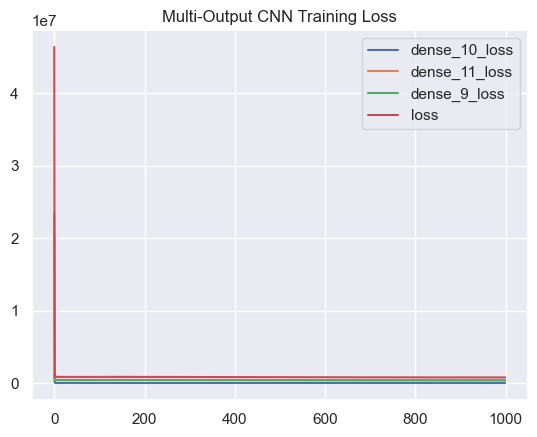

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - dense_10_loss: 5374.0703 - dense_11_loss: 417234.3750 - dense_9_loss: 385950.3750 - loss: 807431.9375
Multi-Output CNN Loss: [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]


In [34]:
if serie_precio_rrp is not None:
    entradas_forecasting_multiple, salidas_forecasting_multiple = dividir_secuencia_forecasting_multiple(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_forecasting = entradas_forecasting_multiple.shape[2]

    entrada_visible = Input(shape=(tamanio_ventana, numero_caracteristicas_forecasting))
    capa_cnn = Conv1D(64, 2, activation='relu')(entrada_visible)
    capa_cnn = MaxPooling1D()(capa_cnn)
    capa_cnn = Flatten()(capa_cnn)
    capa_cnn = Dense(50, activation='relu')(capa_cnn)

    salida_feature1 = Dense(1)(capa_cnn)
    salida_feature2 = Dense(1)(capa_cnn)
    salida_feature3 = Dense(1)(capa_cnn)

    modelo_multi_output = Model(inputs=entrada_visible, outputs=[salida_feature1, salida_feature2, salida_feature3])
    modelo_multi_output.compile(optimizer='adam', loss='mse')

    salida_objetivo_feature1 = salidas_forecasting_multiple[:, 0].reshape((salidas_forecasting_multiple.shape[0], 1))
    salida_objetivo_feature2 = salidas_forecasting_multiple[:, 1].reshape((salidas_forecasting_multiple.shape[0], 1))
    salida_objetivo_feature3 = salidas_forecasting_multiple[:, 2].reshape((salidas_forecasting_multiple.shape[0], 1))

    historial_entrenamiento_multi_output = modelo_multi_output.fit(entradas_forecasting_multiple,
                                                                   [salida_objetivo_feature1, salida_objetivo_feature2, salida_objetivo_feature3],
                                                                   epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_multi_output.history).plot(title='Multi-Output CNN Training Loss')
    plt.grid(True)
    plt.show()

    perdida_multi_output = modelo_multi_output.evaluate(entradas_forecasting_multiple,
                                                          [salida_objetivo_feature1, salida_objetivo_feature2, salida_objetivo_feature3])
    print(f'Multi-Output CNN Loss: {perdida_multi_output}')
else:
    print("Se omite Multi-Output CNN")

### SERIE TEMPORAL MULTIVARIADA

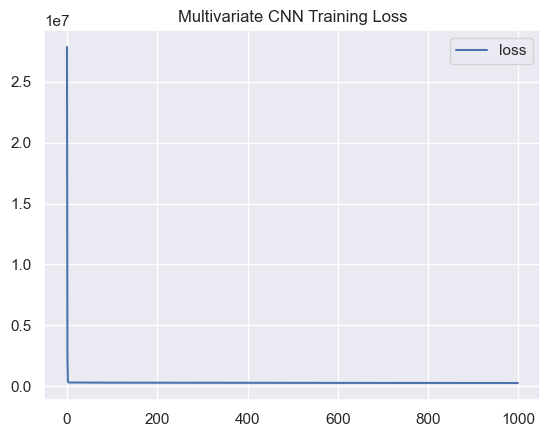

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 300310.9375
Multivariate CNN Loss: 280219.8438


In [35]:
if serie_precio_rrp is not None:
    entradas_multivariadas_temporales, salidas_multivariadas_temporales = dividir_secuencia_multivariada(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_temporales = entradas_multivariadas_temporales.shape[2]

    modelo_temporal_multivariado = Sequential()
    modelo_temporal_multivariado.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas_temporales)))
    modelo_temporal_multivariado.add(Conv1D(64, 2, activation='relu'))
    modelo_temporal_multivariado.add(MaxPooling1D())
    modelo_temporal_multivariado.add(Flatten())
    modelo_temporal_multivariado.add(Dense(50, activation='relu'))
    modelo_temporal_multivariado.add(Dense(1))
    modelo_temporal_multivariado.compile(optimizer='adam', loss='mse')

    historial_entrenamiento_temporal_multivariado = modelo_temporal_multivariado.fit(entradas_multivariadas_temporales, salidas_multivariadas_temporales, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_temporal_multivariado.history).plot(title='Multivariate CNN Training Loss')
    plt.grid(True)
    plt.show()

    perdida_modelo_temporal_multivariado = modelo_temporal_multivariado.evaluate(entradas_multivariadas_temporales, salidas_multivariadas_temporales)
    print(f'Multivariate CNN Loss: {perdida_modelo_temporal_multivariado:.4f}')
else:
    print("Se omite Serie Temporal ")

### SERIES PARALELAS

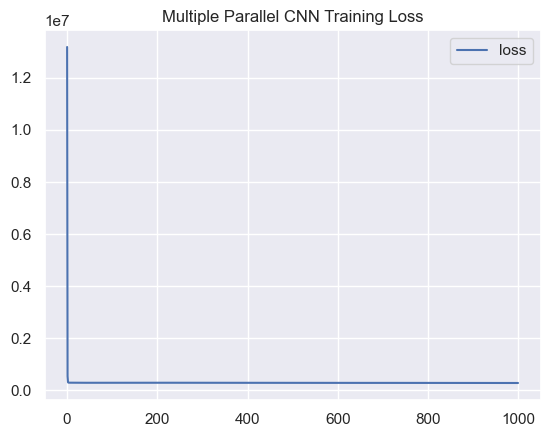

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 287346.2500
Multiple Parallel CNN Loss: 266706.4688


In [36]:
if serie_precio_rrp is not None:
    entradas_series_paralelas, salidas_series_paralelas = dividir_secuencia_forecasting_multiple(conjunto_datos_multivariado, tamanio_ventana)
    numero_caracteristicas_series_paralelas = entradas_series_paralelas.shape[2]

    modelo_series_paralelas = Sequential()
    modelo_series_paralelas.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas_series_paralelas)))
    modelo_series_paralelas.add(Conv1D(64, 2, activation='relu'))
    modelo_series_paralelas.add(MaxPooling1D())
    modelo_series_paralelas.add(Flatten())
    modelo_series_paralelas.add(Dense(50, activation='relu'))
    modelo_series_paralelas.add(Dense(numero_caracteristicas_series_paralelas))
    modelo_series_paralelas.compile(optimizer='adam', loss='mse')

    historial_entrenamiento_series_paralelas = modelo_series_paralelas.fit(entradas_series_paralelas, salidas_series_paralelas, epochs=1000, verbose=0)
    pd.DataFrame(historial_entrenamiento_series_paralelas.history).plot(title='Multiple Parallel CNN Training Loss')
    plt.grid(True)
    plt.show()

    perdida_series_paralelas = modelo_series_paralelas.evaluate(entradas_series_paralelas, salidas_series_paralelas)
    print(f'Multiple Parallel CNN Loss: {perdida_series_paralelas:.4f}')
else:
    print("Se omiten Series Paralelas")


### DROPOUT

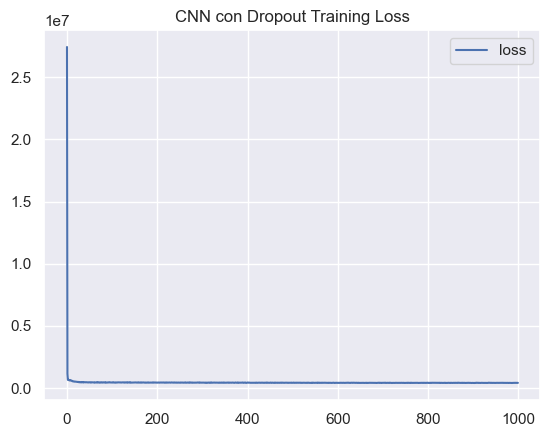

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN con Dropout R² Score: -2.6587


In [37]:
modelo_cnn_dropout = Sequential()
modelo_cnn_dropout.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_dropout.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_dropout.add(Dropout(0.2))
modelo_cnn_dropout.add(MaxPooling1D())
modelo_cnn_dropout.add(Flatten())
modelo_cnn_dropout.add(Dense(50, activation='relu'))
modelo_cnn_dropout.add(Dense(1))
modelo_cnn_dropout.compile(optimizer='adam', loss='mse')

historial_dropout = modelo_cnn_dropout.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_dropout.history).plot(title='CNN con Dropout Training Loss')
plt.grid(True)
plt.show()

predicciones_dropout = modelo_cnn_dropout.predict(entradas_univariadas).flatten()
r2_dropout = r2_score(salidas_univariadas, predicciones_dropout)
print(f'CNN con Dropout R² Score: {r2_dropout:.4f}')

### CNN Bidireccional

Entrenando CNN Bidireccional...


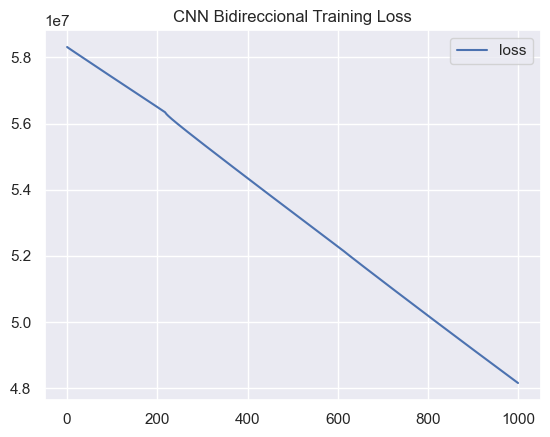

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
CNN Bidireccional R² Score: -72.9336


In [38]:
modelo_cnn_bidireccional = Sequential()
modelo_cnn_bidireccional.add(keras.layers.Input(shape=(tamanio_ventana, numero_caracteristicas)))
modelo_cnn_bidireccional.add(Conv1D(64, 2, activation='relu'))
modelo_cnn_bidireccional.add(MaxPooling1D())
modelo_cnn_bidireccional.add(Bidirectional(LSTM(50)))
modelo_cnn_bidireccional.add(Dense(1))
modelo_cnn_bidireccional.compile(optimizer='adam', loss='mse')

print("Entrenando CNN Bidireccional...")
historial_bidireccional = modelo_cnn_bidireccional.fit(entradas_univariadas, salidas_univariadas, epochs=1000, verbose=0)
pd.DataFrame(historial_bidireccional.history).plot(title='CNN Bidireccional Training Loss')
plt.grid(True)
plt.show()

predicciones_bidireccional = modelo_cnn_bidireccional.predict(entradas_univariadas).flatten()
r2_bidireccional = r2_score(salidas_univariadas, predicciones_bidireccional)
print(f'CNN Bidireccional R² Score: {r2_bidireccional:.4f}')

### Entrenamiento y evaluación

In [39]:
print("\n----- RESUMEN DE RESULTADOS -----")
print(f"CNN Univariada R² Score: {r2_cnn_univariada:.4f}")
if serie_precio_rrp is not None:
    print(f"Multi-Input CNN Loss: {perdida_multi_input:.4f}")
    print(f"Multi-Output CNN Loss: {perdida_multi_output}")
    print(f"Serie Temporal Multivariada (CNN) Loss: {perdida_multi_input:.4f}")
    print(f"Series Paralelas (CNN) Loss: {perdida_series_paralelas:.4f}")
print(f"CNN con Dropout R² Score: {r2_dropout:.4f}")
print(f"CNN Bidireccional R² Score: {r2_bidireccional:.4f}")


----- RESUMEN DE RESULTADOS -----
CNN Univariada R² Score: 0.4156
Multi-Input CNN Loss: 286184.6562
Multi-Output CNN Loss: [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]
Serie Temporal Multivariada (CNN) Loss: 286184.6562
Series Paralelas (CNN) Loss: 266706.4688
CNN con Dropout R² Score: -2.6587
CNN Bidireccional R² Score: -72.9336


### Visualización

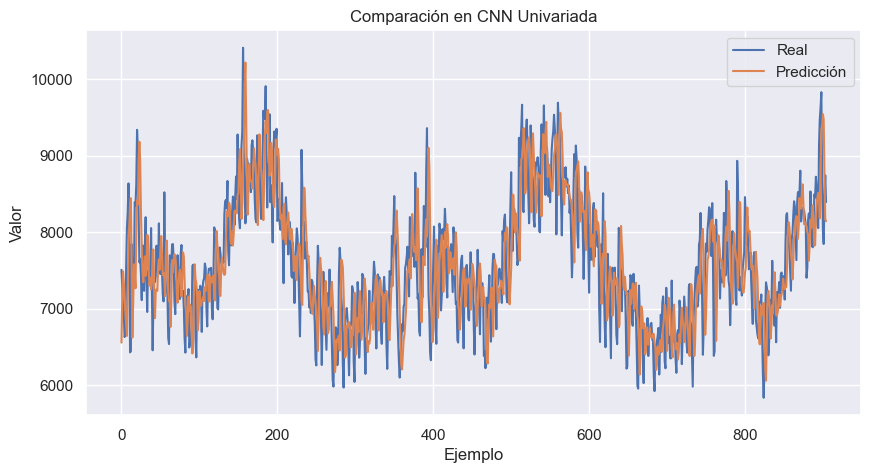

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(salidas_univariadas, label='Real')
plt.plot(predicciones_cnn_univariada, label='Predicción')
plt.title('Comparación en CNN Univariada')
plt.xlabel('Ejemplo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### Evaluación

In [41]:
print("\n----- EVALUACIÓN FINAL DE TODOS LOS MODELOS -----")
print(f"CNN Univariada: R² Score = {r2_cnn_univariada:.4f}")
if serie_precio_rrp is not None:
    print(f"Multi-Input CNN: Loss = {perdida_multi_input:.4f}")
    print(f"Multi-Output CNN: Loss = {perdida_multi_output}")
    print(f"Serie Temporal Multivariada (CNN): Loss = {perdida_multi_input:.4f}")
    print(f"Series Paralelas (CNN): Loss = {perdida_series_paralelas:.4f}")
print(f"CNN con Dropout: R² Score = {r2_dropout:.4f}")
print(f"CNN Bidireccional: R² Score = {r2_bidireccional:.4f}")


----- EVALUACIÓN FINAL DE TODOS LOS MODELOS -----
CNN Univariada: R² Score = 0.4156
Multi-Input CNN: Loss = 286184.6562
Multi-Output CNN: Loss = [742100.8125, 358754.65625, 5825.5986328125, 394423.1875]
Serie Temporal Multivariada (CNN): Loss = 286184.6562
Series Paralelas (CNN): Loss = 266706.4688
CNN con Dropout: R² Score = -2.6587
CNN Bidireccional: R² Score = -72.9336


### Conclusiones
Podemos notar que en CNN univariada, dropout y bidireccional tuvimos una R2 muy mala.
Los valores negativos de R² Score en algunos casos sugieren que ciertos modelos están sobreajustando o simplemente no logran generalizar correctamente.
Se observa que modelos demasiado complejos tienden a perder capacidad de generalización, mientras que los más simples tampoco logran un ajuste óptimo. Los modelos con una estructura más equilibrada, como el de múltiples entradas y múltiples salidas, mostraron un mejor desempeño.

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........